In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import mean_squared_error
import math

C:\Users\Дом\AppData\Roaming\Python\Python35\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


In [90]:
#!pip install --upgrade scipy --user

In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [92]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [93]:
#data = pd.read_csv('OnlineNewsPopularity.csv', sep = ',')

In [2]:
data = pd.read_csv('hour_bs_ds.csv', sep = ',')

In [3]:
len(data)

17379

In [96]:
pd.set_option('display.max_columns', None)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## EDA

In [97]:
# Первичное знакомство с данными

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [99]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [100]:
# Распределение целевой переменной

<IPython.core.display.Javascript object>


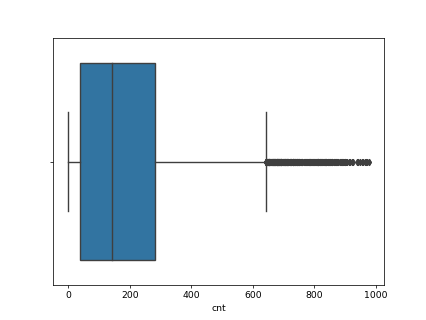

In [131]:
#column=['Col1', 'Col2'], by=['X', 'Y'])
%matplotlib notebook
#from scipy.misc import doccer
import seaborn as sns
import  matplotlib.pyplot  as plt
ax = sns.boxplot(x=data['cnt'])
#plt.show()

In [102]:
# Удаление переменных, не подходящих в качестве предикторов

In [11]:
data2 = pd.DataFrame(data.drop(['dteday'], axis=1).drop(['casual'], axis=1).drop(['registered'], axis=1).drop(['instant'], axis=1))

In [104]:
# Анализ корреляций для поиска наиболее скореллированных переменных

<IPython.core.display.Javascript object>


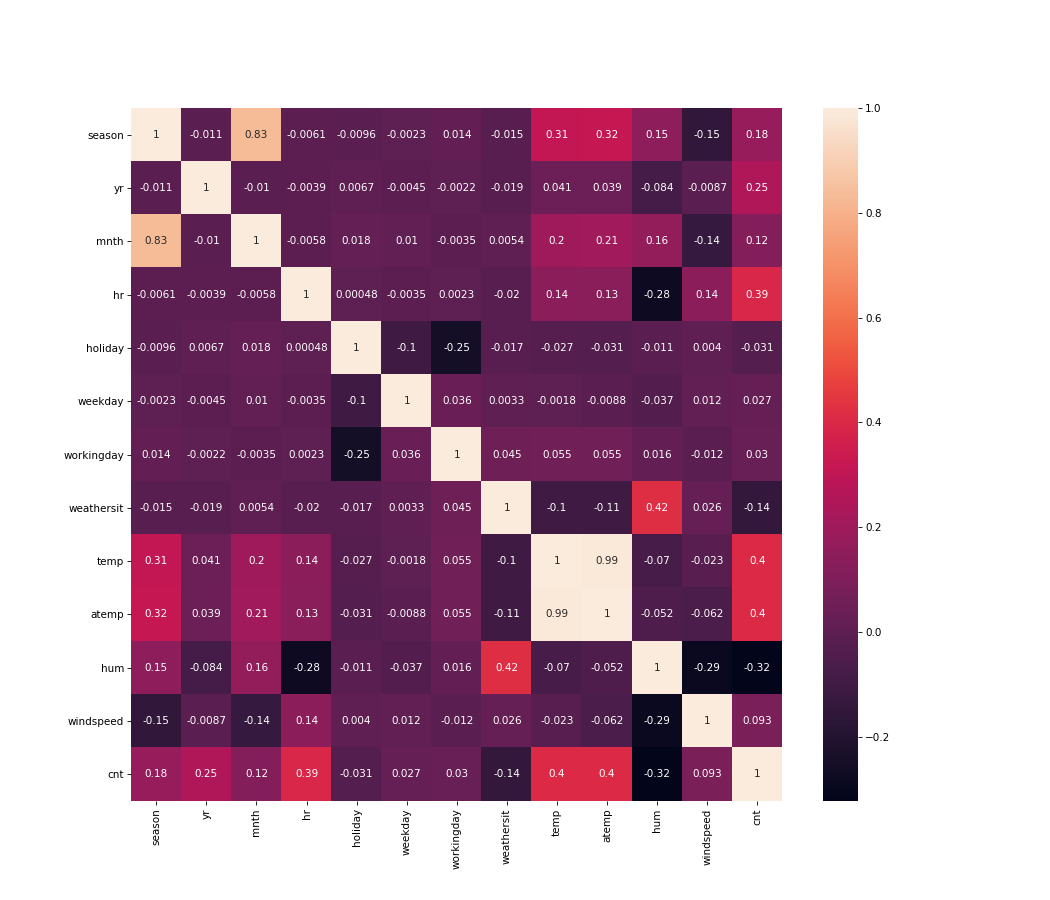

In [12]:
%matplotlib notebook
import matplotlib.pylab as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(data2.corr(), annot=True, ax=ax)

In [106]:
# Анализ распределений числовых переменных из датасета

<IPython.core.display.Javascript object>


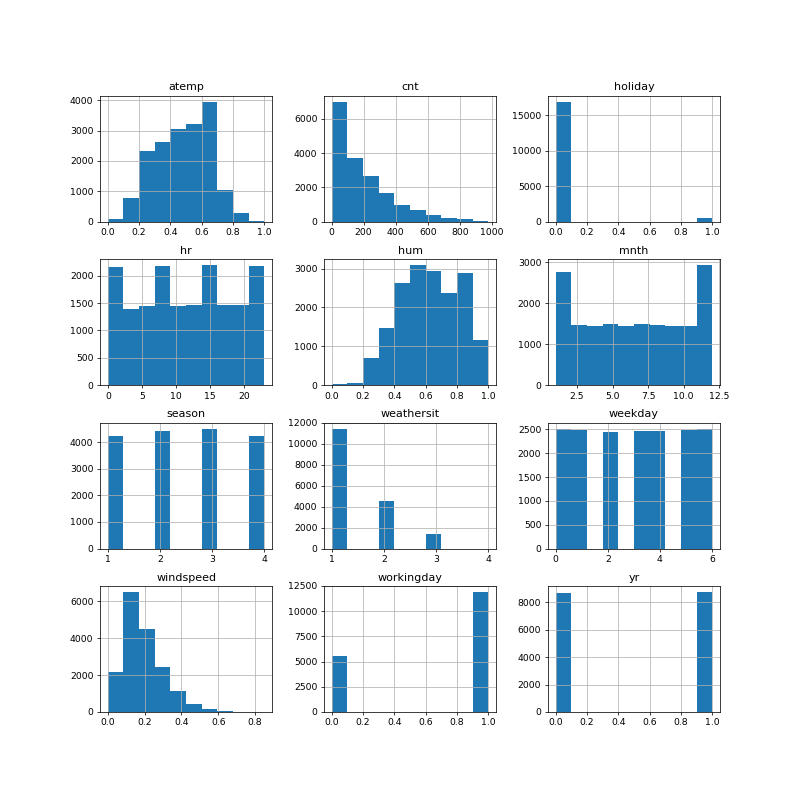

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000097B4D98550>,
      dtype=object)

In [133]:
%matplotlib notebook
features_numer = []
for i in range(len(data2.columns)):
    if data2.iloc[:,i].dtype != 'O':
        features_numer.append(data2.iloc[:,i].name)
features_numer = list(set(features_numer))
data_numer = pd.DataFrame(data2,columns=features_numer)
#data_obj
data_numer.hist(figsize=(12,12))

In [108]:
# Сравнение, как распределяются значения целевой переменной по значениям сильно коррелированных фаткоров

<IPython.core.display.Javascript object>


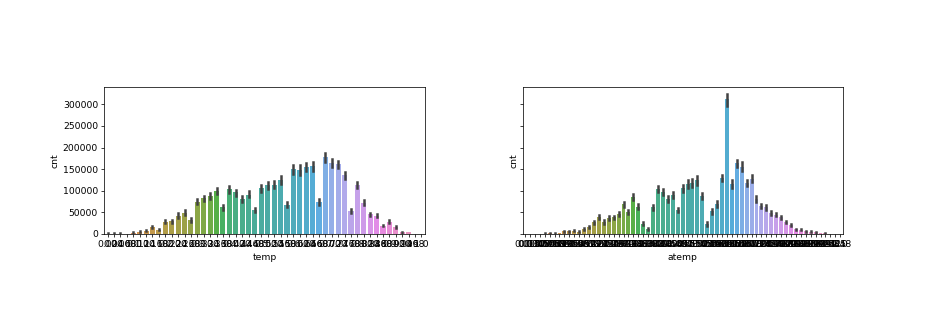

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [136]:
%matplotlib notebook
figure, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 5))
figure.tight_layout(pad=9)

feat_names_2=['temp', 'atemp']
for idx, feat in  enumerate(feat_names_2):
    sns.barplot(x=feat,y='cnt',data=data2,estimator=sum,  ax=axes[int (idx  / 1)])

In [110]:
# Удаляю один из сильно коррелирующих признаков

In [16]:
data2 = data2.drop('temp',axis=1)

In [20]:
# Вывожу количество уникальных значений по переменным

In [8]:
data2.nunique().sort_values()

yr              2
holiday         2
workingday      2
season          4
weathersit      4
weekday         7
mnth           12
hr             24
windspeed      30
atemp          65
hum            89
cnt           869
dtype: int64

In [113]:
# Анализ наличия выбросов по переменным

<IPython.core.display.Javascript object>


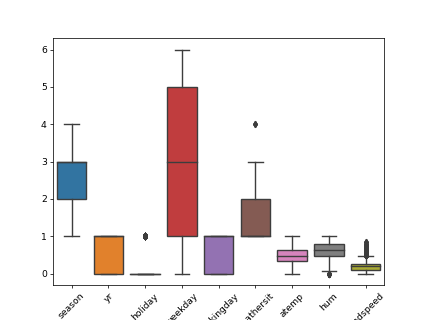

[Text(0, 0, 'season'),
 Text(0, 0, 'yr'),
 Text(0, 0, 'holiday'),
 Text(0, 0, 'weekday'),
 Text(0, 0, 'workingday'),
 Text(0, 0, 'weathersit'),
 Text(0, 0, 'atemp'),
 Text(0, 0, 'hum'),
 Text(0, 0, 'windspeed')]

In [138]:
%matplotlib notebook
chart = sns.boxplot(data=data2.drop(['cnt'], axis=1).drop(['hr','mnth'], axis=1))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<IPython.core.display.Javascript object>


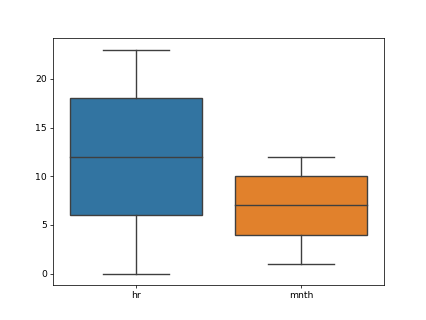

In [139]:
%matplotlib notebook
sns.boxplot(data=data2[['hr','mnth']])

In [116]:
# Анализ того, как распределяются значения зависимой переменной по значениям категориальных

<IPython.core.display.Javascript object>


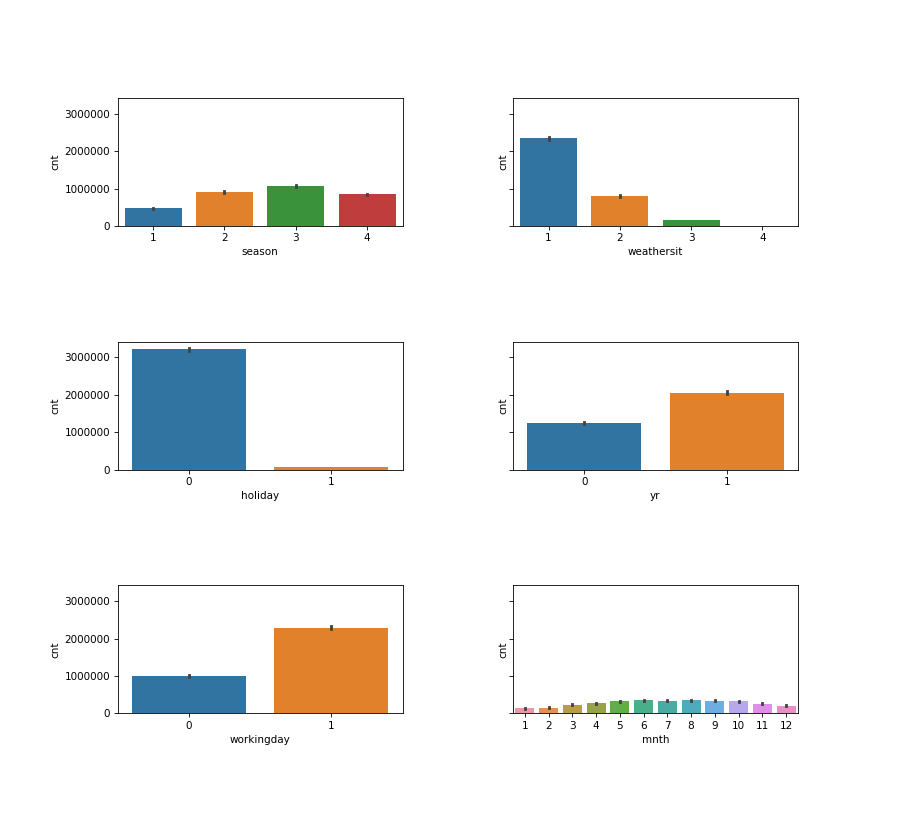

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [117]:
%matplotlib notebook
figure, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(12, 11))
figure.tight_layout(pad=9)

feat_names=['season', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth']
for idx, feat in  enumerate(feat_names):
    sns.barplot(x=feat,y='cnt',data=data2,estimator=sum,  ax=axes[idx  % 3, int (idx  / 3)])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


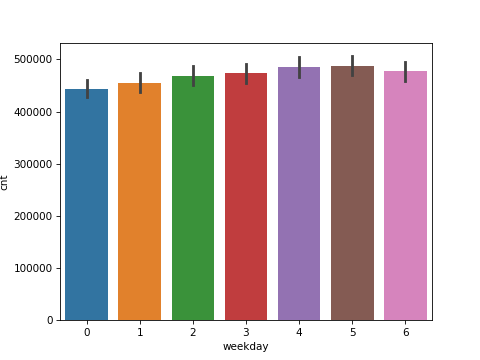

In [10]:
%matplotlib notebook
sns.barplot(x='weekday',y='cnt',data=data2,estimator=sum)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


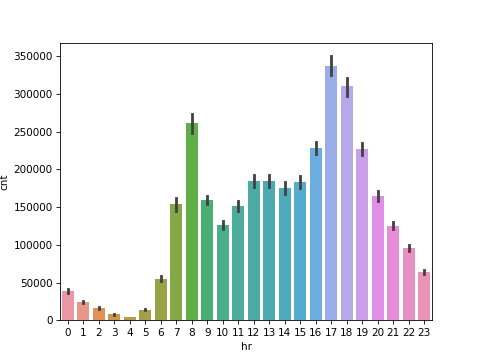

In [19]:
%matplotlib notebook
sns.barplot(x='hr',y='cnt',data=data2,estimator=sum)

In [17]:
X = data2.drop(['cnt'], axis=1)
Y = data2.cnt

## Modeling

In [118]:
# Использую классификатор без подбора параметров (в качестве baseline)

In [18]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

skf = StratifiedKFold(n_splits=5, random_state=14, shuffle=True)
rfr_def = RandomForestRegressor(random_state=8)


results = cross_val_score(rfr_def, X, Y, cv=skf)
print('Mean score for not tuned Random forest regressor: %0.4f' % results.mean())

Mean score for not tuned Random forest regressor: 0.9389


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [120]:
# Использую GridSearchCV для улучшения модели

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    }

In [123]:
rfr_gs=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,scoring='r2')

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 16)
rfr_gs.fit(X_train, Y_train)
rfr_gs.best_params_

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

{'max_features': 'auto', 'n_estimators': 200}

In [125]:
params = {}
params['n_estimators'] = rfr_gs.best_params_['n_estimators']
params['max_features'] = rfr_gs.best_params_['max_features']

In [126]:
rf_tuned = RandomForestRegressor(**params)
rf_tuned.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [127]:
print('Random forest regressor (tuned) score: %0.4f' %rf_tuned.score(X_test, Y_test))

Random forest regressor (tuned) score: 0.9393


In [128]:
# Значимость переменных

In [129]:
import numpy as np
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

<IPython.core.display.Javascript object>


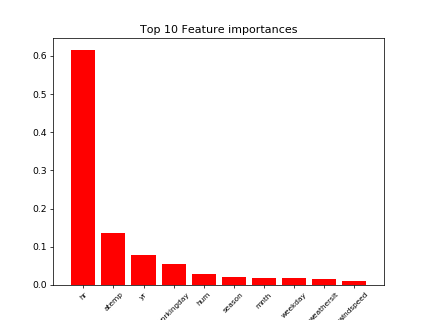

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Feature importances')

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x971a6adc88>,
 <a list of 10 Text xticklabel objects>)

(-1, 10)

In [130]:
indices=indices[:10] 
plt.figure()
plt.title("Top 10 Feature importances") 
plt.bar(range(10), importances[indices], color="r", align="center") 
plt.xticks(range(10), X.columns[indices], fontsize=8, rotation=45) 
plt.xlim([-1, 10])
plt.show()